
### **Project: Brain MRI Image Segmentation using K-Means Clustering**

**Introduction:**
This project demonstrates the use of **K-Means clustering**, an unsupervised machine learning algorithm, to segment **brain MRI images**. The goal is to group pixels with similar intensity values into distinct clusters, highlighting major brain regions such as gray matter, white matter, cerebrospinal fluid, and background.

**Key Steps:**

1. **Load and preprocess the image** using `pydicom` (for DICOM images) or `PIL`/`Matplotlib` for standard images.
2. **Normalize pixel values** to a 0–1 range to improve clustering performance.
3. **Reshape the image** into a 2D array for K-Means clustering.
4. **Apply K-Means clustering** (`sklearn.cluster.KMeans`) to segment the image into `k` clusters.
5. **Visualize the results**:

   * Original vs segmented image (`matplotlib.pyplot.imshow`)
   * Individual cluster segments
   * Determine optimal `k` using the **Elbow Method**.

**Libraries and Functions Used:**

* `numpy` → Array manipulations (`reshape`, normalization).
* `matplotlib.pyplot` → Display images (`imshow`, `figure`).
* `sklearn.cluster.KMeans` → Perform K-Means clustering (`fit_predict`, `cluster_centers_`).
* `pydicom` → Read medical DICOM images (`dcmread`, `pixel_array`).
* `PIL.Image` → Load and resize standard images (`open`, `resize`).

**Outcome:**
The project produces a **segmented brain image** with clusters representing distinct tissue types, which can aid in **visualization, analysis, and clinical insights**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image # Python Image Library

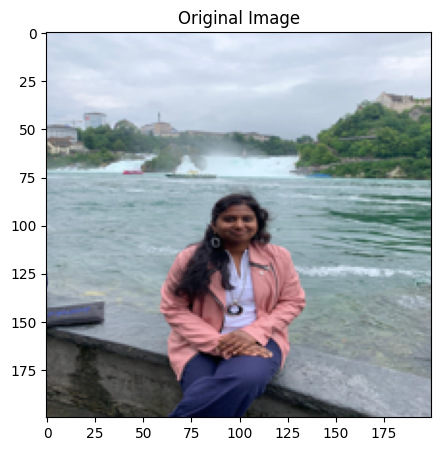

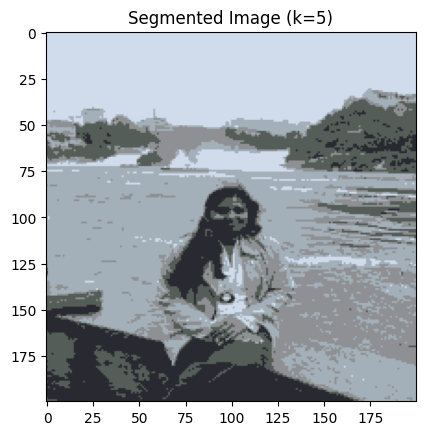

In [ ]:
# Image path and number of clusters
image_path = "/content/My_Image.png"  # Replace with your image path
k = 5  # Number of clusters

# Load and resize the image
img = Image.open(image_path)
img = img.resize((200, 200))
img_array = np.array(img)

# Display the original image
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.title("Original Image")
plt.show()


# Reshape the image array for K-means
h, w, c = img_array.shape
pixels = img_array.reshape(h * w, c)

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)

# Create the segmented image
segmented_image = kmeans.cluster_centers_[labels].reshape(h, w, c).astype(np.uint8)

# Display the segmented image
# plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.show()

**Observations:**

Original Image:

*  The original image is shown with its full range of colors and details.

*  Every pixel retains its true color values, so the image looks natural and smooth.

Segmented Image (k = 5):

*  The image is reduced to 5 dominant colors (clusters) using K-Means.

*  Fine details are lost, but the main color regions and patterns are preserved.

*  This creates a simplified, poster-like effect where similar colors are grouped together.

*  Useful for tasks like image compression, object detection, or highlighting regions by color.

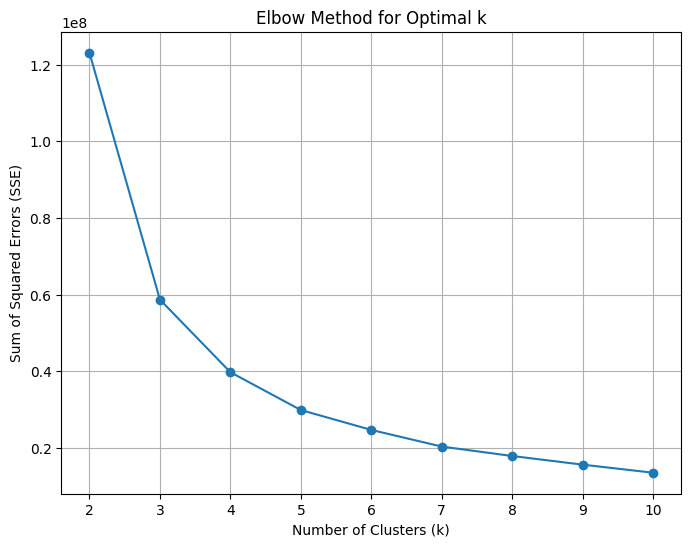

In [ ]:
# Elbow Method
sse = []  # Sum of Squared Errors
K = range(2, 11)  # Range of k values to try (at least 2 for Silhouette)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)  # Set x-axis ticks to integer values
plt.grid(True)
plt.show()

**Observations:**

*  The Elbow method plots SSE (Sum of Squared Errors) against different values of k.

*  SSE decreases as k increases, because more clusters fit the data better.

*  The “elbow point” is where the rate of decrease sharply slows down.

*  In this plot, the elbow appears around k = 4, meaning 4 clusters balance accuracy and simplicity.

*  Beyond k = 4, the improvement in SSE is small (diminishing returns).

In [ ]:
pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.5 MB/s eta 0:00:00


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

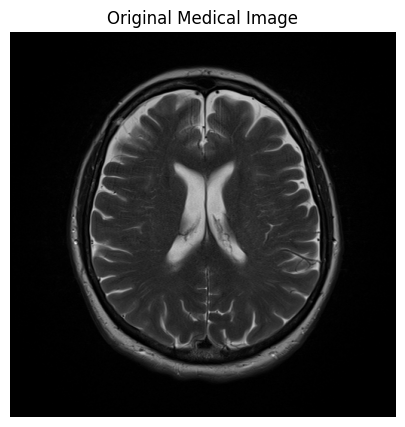

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pydicom

# DICOM file path
dicom_path = "/content/Vida_Head.MR.Comp_DR-Gain_DR.1005.1.2021.04.27.14.20.13.818.14380335 (1) (1).dcm"  # Replace with your DICOM path

# Read DICOM image
dataset = pydicom.dcmread(dicom_path)
img_array = dataset.pixel_array.astype(float)

# # Normalize pixel values
img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
# # Display original image
plt.figure(figsize=(10, 5))
plt.imshow(img_array, cmap=plt.cm.gray)
plt.title("Original Medical Image")
plt.axis('off')

**Observations:**

*  The original brain image shows continuous gray-scale intensity values representing different tissue densities.
*  After K-Means clustering, the image is divided into distinct regions (clusters), which can help highlight structures like gray matter, white matter, and possible anomalies by grouping pixels with similar intensities.

In [ ]:
# Reshape for K-means
h, w = img_array.shape
pixels = img_array.reshape(h * w, 1)

# K-means clustering (example: k=3)
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)


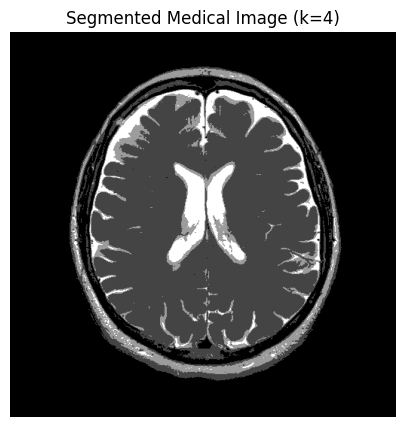

In [ ]:
# Create segmented image
segmented_image = kmeans.cluster_centers_[labels].reshape(h, w)
# Display segmented image
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image, cmap=plt.cm.gray)
plt.title(f"Segmented Medical Image (k={k})")
plt.axis('off')
plt.show()


**Observations on Segmented Medical Image (k=4):**

*  The image is now divided into 4 distinct intensity-based regions, instead of continuous grayscale.

*  Similar tissue types (e.g., gray matter, white matter, cerebrospinal fluid) are grouped together by pixel intensity.

*  Fine details are reduced, but major structures become clearer due to segmentation.

*  This helps in highlighting boundaries and simplifying analysis for medical purposes (like detecting regions of interest or anomalies).

*  The segmented image looks more like a posterized version of the original, where each cluster represents a tissue class.

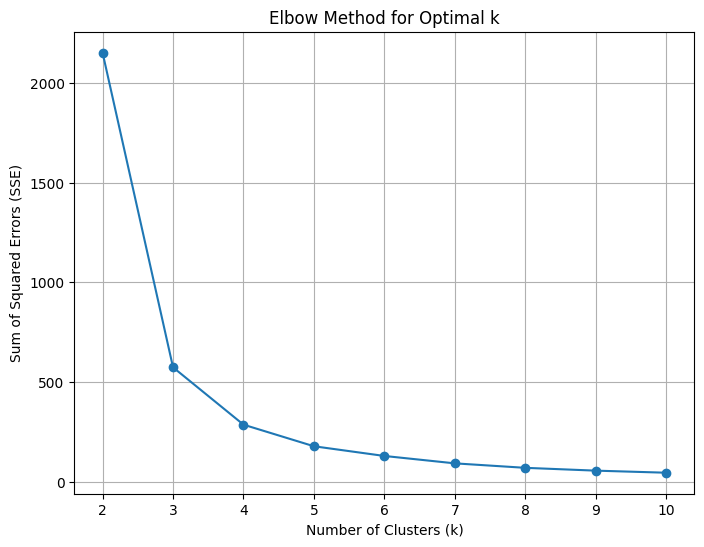

In [ ]:
# Elbow Method
sse = []
K = range(2, 11)  # Test k values from 2 to 10

for k_elbow in K:  # Use a different variable name for k in the loop
    kmeans_elbow = KMeans(n_clusters=k_elbow, random_state=42, n_init=10)
    kmeans_elbow.fit(pixels)
    sse.append(kmeans_elbow.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


**Observations – Elbow Method (Brain Medical Image):**

*  The SSE curve decreases as the number of clusters increases, showing that more clusters capture finer intensity variations in the brain image.

*  The “elbow point” in the curve suggests the optimal number of tissue groups to represent the brain scan (e.g., gray matter, white matter, CSF, background).

*  Beyond the elbow, adding more clusters gives only small improvements, which may not be clinically meaningful.

*  In this case, the elbow appears around k = 4 indicating the most balanced number of clusters for segmentation.

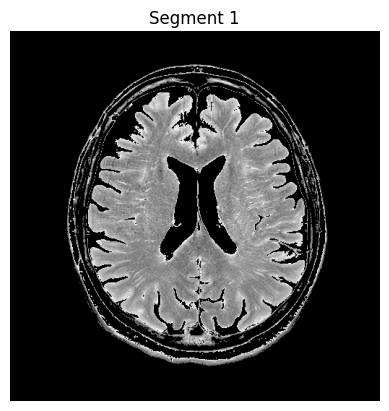

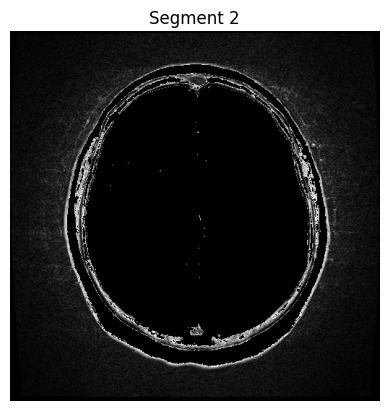

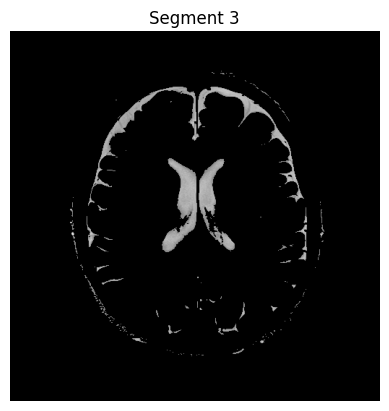

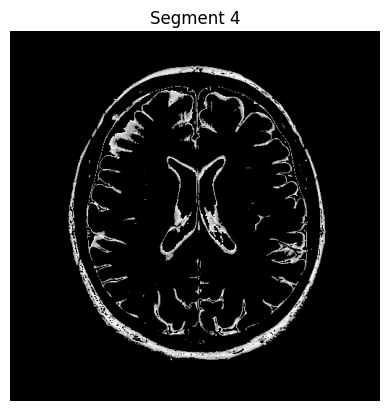

In [ ]:
for i in range(k):
    cluster_mask = (labels.reshape(h, w) == i)
    segment = img_array * cluster_mask

    plt.figure()  # New figure for each segment
    plt.imshow(segment, cmap=plt.cm.gray)
    plt.title(f"Segment {i+1}")
    plt.axis('off')
    plt.show()

**Observations:**

*  Segment 1 → Highlights the background region.

*  Segment 2 → Shows cerebrospinal fluid (CSF) areas.

*  Segment 3 → Captures gray matter regions.

*  Segment 4 → Represents white matter structures.

**Insights and Conclusions:**

*  Tissue Differentiation: K-Means effectively groups pixels with similar intensities, allowing clear separation of major brain regions such as background, cerebrospinal fluid, gray matter, and white matter.

*  Image Simplification: The segmented image reduces complexity while preserving key structural information, making it easier to visualize and analyze.

*  Optimal Clusters (k): Using methods like the Elbow method, an optimal number of clusters (typically 3–5) balances detail and simplicity, avoiding unnecessary noise.

*  Clinical Relevance: Segmentation highlights distinct tissue types, which can aid in diagnosis, tissue quantification, or anomaly detection.

*  Limitations: K-Means is intensity-based, so subtle variations within the same tissue type may not be captured; it also requires a pre-defined k.